In [72]:
import pandas as pd
import matplotlib.pyplot as plt

from src.utils import *

%reload_ext autoreload
%autoreload 2

%aimport src.utils

df = pd.read_csv(conf.dataset_path, index_col='Date')
df = df.iloc[::-1]

### Dataset and it's statistics

In [73]:
df.head()

,Volume,Open,Close,High,Low
Date,,,,,
2021/08/27,2.045602e+05,0.493377,0.618263,0.619192,0.463996
2021/08/28,1.166856e+05,0.618263,0.602768,0.633747,0.531502
2021/08/29,1.105447e+05,0.602768,0.548015,0.610971,0.514528
2021/08/30,6.956799e+05,0.548015,0.879532,0.939249,0.545316
2021/08/31,1.317655e+06,0.879532,1.045401,1.148265,0.798556


In [74]:
df.describe()

,Volume,Open,Close,High,Low
count,8.040000e+02,804.000000,804.000000,804.000000,804.000000
mean,6.464789e+06,1.836827,1.839542,1.908602,1.771327
std,8.979842e+06,0.699373,0.698249,0.743568,0.671632
min,2.566223e+04,0.493377,0.548015,0.610971,0.383749
25%,9.224466e+05,1.346002,1.346727,1.373812,1.294619
50%,2.994136e+06,1.839500,1.839909,1.879509,1.793037
75%,7.582020e+06,2.266575,2.268144,2.322603,2.208749
max,6.165645e+07,4.427254,4.432000,5.315531,4.191664


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 804 entries, 2021/08/27 to 2023/11/08
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Volume  804 non-null    float64
 1   Open    804 non-null    float64
 2   Close   804 non-null    float64
 3   High    804 non-null    float64
 4   Low     804 non-null    float64
dtypes: float64(5)
memory usage: 37.7+ KB


In [76]:
print(df.head().to_markdown())

| Date       |           Volume |     Open |    Close |     High |      Low |
|:-----------|-----------------:|---------:|---------:|---------:|---------:|
| 2021/08/27 | 204560           | 0.493377 | 0.618263 | 0.619192 | 0.463996 |
| 2021/08/28 | 116686           | 0.618263 | 0.602768 | 0.633747 | 0.531502 |
| 2021/08/29 | 110545           | 0.602768 | 0.548015 | 0.610971 | 0.514528 |
| 2021/08/30 | 695680           | 0.548015 | 0.879532 | 0.939249 | 0.545316 |
| 2021/08/31 |      1.31766e+06 | 0.879532 | 1.0454   | 1.14827  | 0.798556 |


### Data visualization

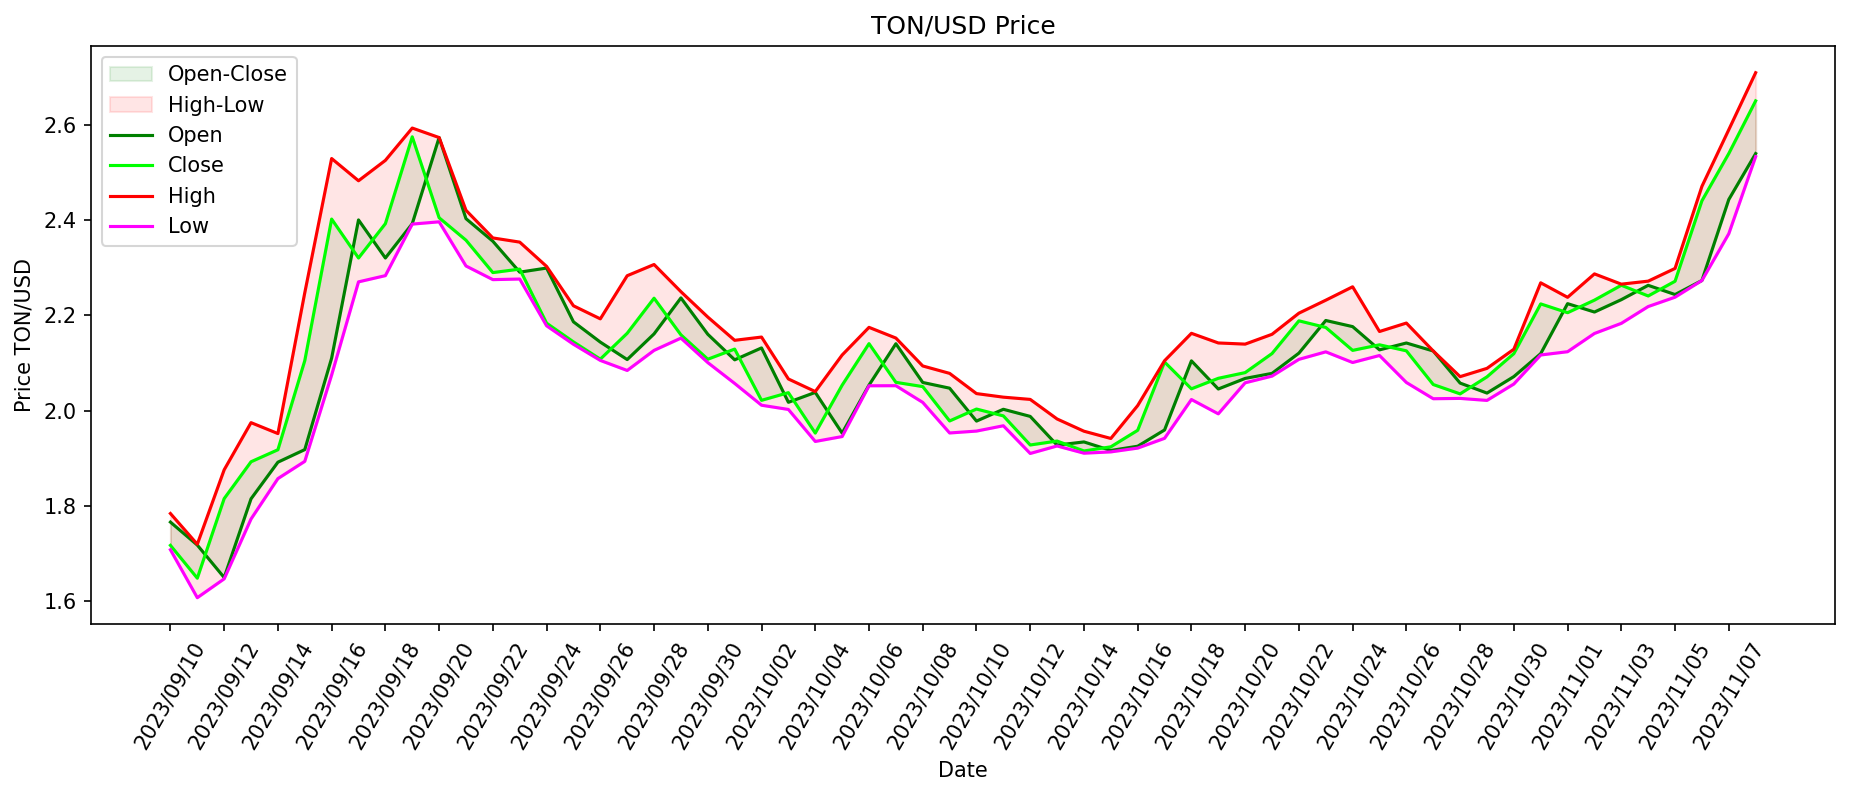

In [78]:
# show only last 2 months
# make text bigger for better readability
df_last_2_months = df.tail(60)

fig = plt.figure(figsize=(15, 5), dpi=150, facecolor='w', edgecolor='k')


plt.fill_between(df_last_2_months.index, df_last_2_months['Open'], df_last_2_months['Close'], color='green', alpha=0.10)
plt.fill_between(df_last_2_months.index, df_last_2_months['High'], df_last_2_months['Low'], color='red', alpha=0.10)
plt.plot(df_last_2_months.index, df_last_2_months['Open'], color='green')
plt.plot(df_last_2_months.index, df_last_2_months['Close'], color='lime')
plt.plot(df_last_2_months.index, df_last_2_months['High'], color='red')
plt.plot(df_last_2_months.index, df_last_2_months['Low'], color='magenta')

plt.legend(['Open-Close', 'High-Low', 'Open', 'Close', 'High', 'Low'])

plt.xticks(rotation=60)
plt.xticks(df_last_2_months.index[::2])
plt.xlabel('Date')
plt.ylabel('Price TON/USD')
plt.title('TON/USD Price')

plt.show()

We alredy know that Open and Close are the same, because of that Open is lag 1 of Close. 

Now we will create diff between Open and Close, High and Low, and plot their distributions.

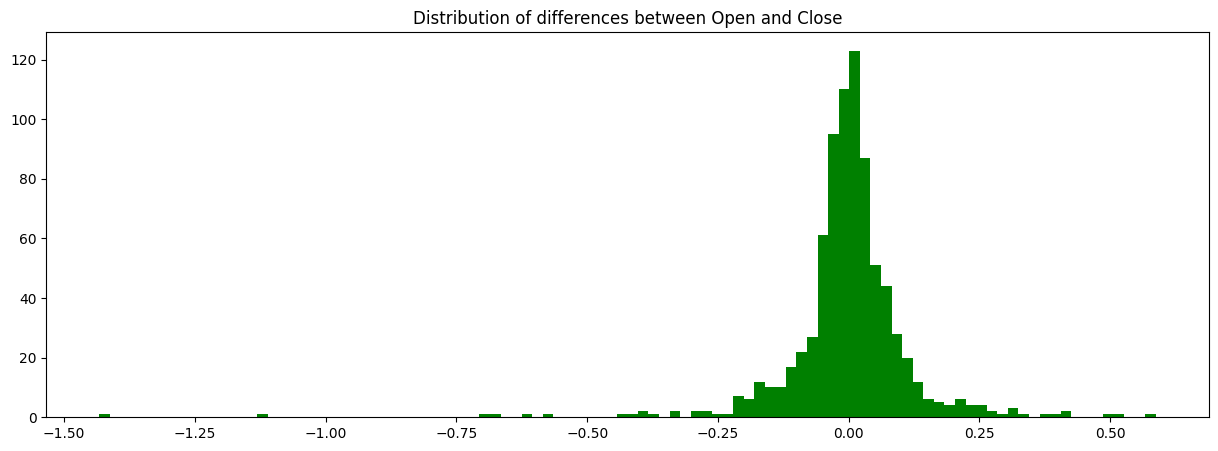

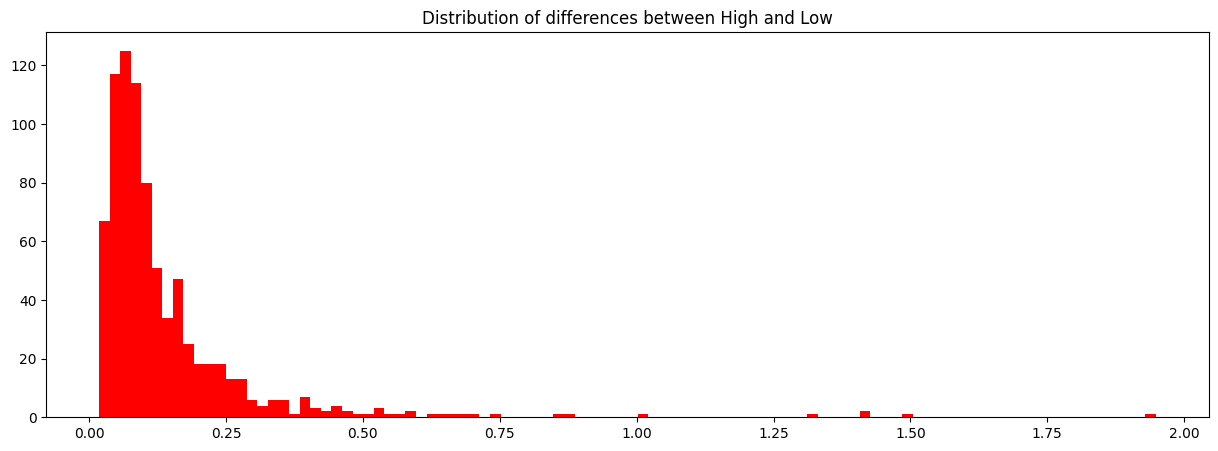

In [86]:
# plot distribution between open and close

df['diff_open_close'] = df['Open'] - df['Close']
df['diff_high_low'] = df['High'] - df['Low']

df['diff_open_close'].hist(bins=100, figsize=(15, 5), grid=False, color='green')
plt.title('Distribution of differences between Open and Close')
plt.show()
df['diff_high_low'].hist(bins=100, figsize=(15, 5), grid=False, color='red')
plt.title('Distribution of differences between High and Low')
plt.show()

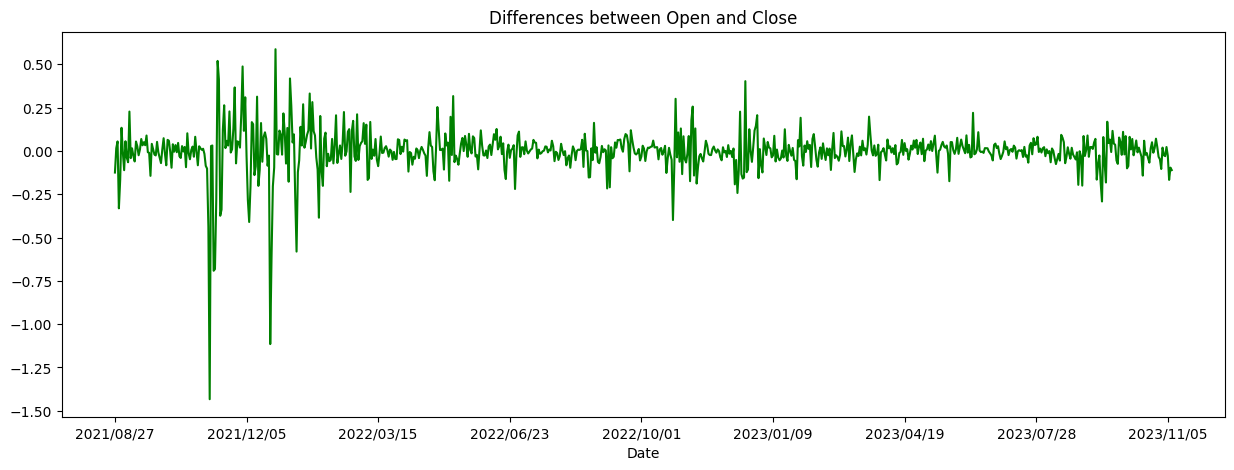

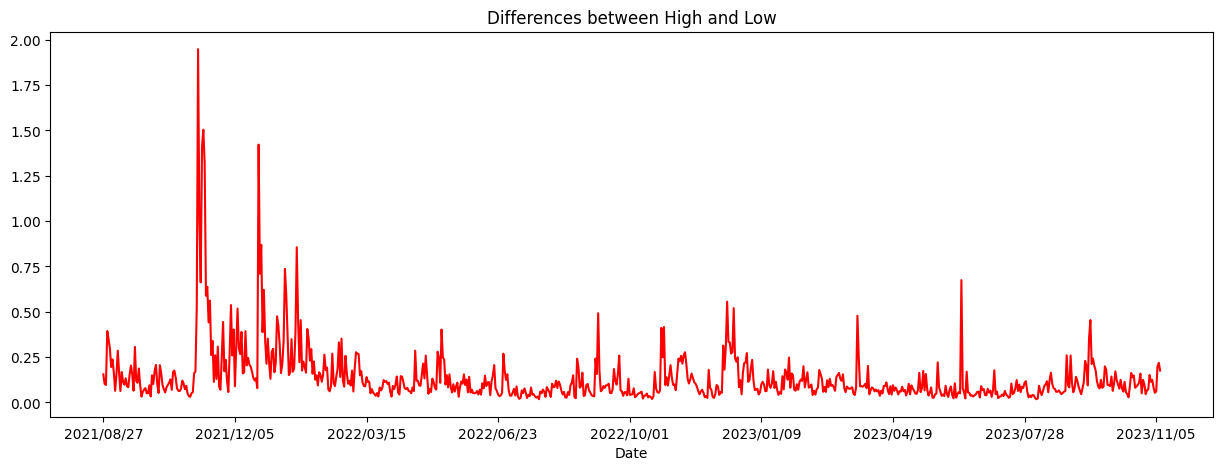

In [88]:
df['diff_open_close'].plot(figsize=(15, 5), grid=False, color='green')
plt.title('Differences between Open and Close')
plt.show()
df['diff_high_low'].plot(figsize=(15, 5), grid=False, color='red')
plt.title('Differences between High and Low')
plt.show()

### Data preprocessing and feature engineering (draft)

In [89]:
from typing import List
# feature engineering functions for time series



def add_lags(df: pd.DataFrame, column: str, 
             lags: List[int], dropna: bool = True) -> pd.DataFrame:
    for lag in lags:
        df[f'{column}_lag_{lag}'] = df[column].shift(lag)
        
    if dropna:
        df.dropna(inplace=True)
    return df

In [90]:
df_t = df.copy(deep=True)

In [91]:
add_lags(df_t, 'Open', range(1, 10))

,Volume,Open,Close,High,Low,diff_open_close,diff_high_low,Open_lag_1,Open_lag_2,Open_lag_3,Open_lag_4,Open_lag_5,Open_lag_6,Open_lag_7,Open_lag_8,Open_lag_9
Date,,,,,,,,,,,,,,,,
2021/09/05,5.143888e+04,0.943941,0.982946,0.982946,0.918851,-0.039005,0.064095,0.999546,0.888264,0.880423,1.013913,0.879532,0.548015,0.602768,0.618263,0.493377
2021/09/06,2.414427e+05,0.982946,1.048285,1.073271,0.917000,-0.065339,0.156271,0.943941,0.999546,0.888264,0.880423,1.013913,0.879532,0.548015,0.602768,0.618263
2021/09/07,2.612812e+05,1.048285,0.821156,1.048285,0.763010,0.227129,0.285275,0.982946,0.943941,0.999546,0.888264,0.880423,1.013913,0.879532,0.548015,0.602768
2021/09/08,1.126736e+05,0.821156,0.862950,0.910537,0.747791,-0.041794,0.162745,1.048285,0.982946,0.943941,0.999546,0.888264,0.880423,1.013913,0.879532,0.548015
2021/09/09,1.011333e+05,0.862950,0.848250,0.889667,0.826934,0.014699,0.062733,0.821156,1.048285,0.982946,0.943941,0.999546,0.888264,0.880423,1.013913,0.879532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023/11/04,7.398260e+06,2.262895,2.240535,2.271676,2.218343,0.022360,0.053333,2.232812,2.206817,2.224422,2.119525,2.071264,2.036676,2.057647,2.125033,2.141816
2023/11/05,6.239786e+06,2.243556,2.271499,2.298389,2.237974,-0.027943,0.060415,2.262895,2.232812,2.206817,2.224422,2.119525,2.071264,2.036676,2.057647,2.125033
2023/11/06,1.314340e+07,2.273053,2.440416,2.470703,2.273053,-0.167362,0.197650,2.243556,2.262895,2.232812,2.206817,2.224422,2.119525,2.071264,2.036676,2.057647


In [92]:
df

,Volume,Open,Close,High,Low,diff_open_close,diff_high_low
Date,,,,,,,
2021/08/27,2.045602e+05,0.493377,0.618263,0.619192,0.463996,-0.124886,0.155196
2021/08/28,1.166856e+05,0.618263,0.602768,0.633747,0.531502,0.015495,0.102245
2021/08/29,1.105447e+05,0.602768,0.548015,0.610971,0.514528,0.054753,0.096443
2021/08/30,6.956799e+05,0.548015,0.879532,0.939249,0.545316,-0.331517,0.393933
2021/08/31,1.317655e+06,0.879532,1.045401,1.148265,0.798556,-0.165869,0.349709
...,...,...,...,...,...,...,...
2023/11/04,7.398260e+06,2.262895,2.240535,2.271676,2.218343,0.022360,0.053333
2023/11/05,6.239786e+06,2.243556,2.271499,2.298389,2.237974,-0.027943,0.060415
2023/11/06,1.314340e+07,2.273053,2.440416,2.470703,2.273053,-0.167362,0.197650


### Trainig and testing (draft)